In [1]:
## For this, we do not need specialisied environment, we will use numpy, scipy and matplotlib

import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate

In [2]:
#Universal constants

w = 0.4128

In [3]:
##let us define the functions to use. We will use a large 

def integrand(x, t, tb):
    return np.sin(x*t)/(1 + (x**2)*(tb**2))


def s(t,tk):
    tb = w*np.pi*tk
    I = integrate.quad(integrand, 0, np.inf, args = (t,tb))[0]
    return I

In [4]:
print(s(0,0.08))

0.0


In [5]:
# gamma_imp =    # depends on v_F somehow, have to find that relation
#tk = 3*gamma_imp/(w*(np.pi**2))

def tk_col(theta,theta_k):
    return 2*theta*np.cos(theta)*np.exp(-np.pi*np.sin(theta)/theta_k)

In [6]:
theta_list = [np.pi/3,np.pi/4]
thetak_list = [np.pi/4,np.pi/6]

for theta in theta_list:
    for thetak in thetak_list:
        tk = tk_col(theta,thetak)
        print("Kondo temperature for theta = ",round(theta,3)," and theta_k = ",round(thetak,2)," is ",round(tk,3))

Kondo temperature for theta =  1.047  and theta_k =  0.79  is  0.033
Kondo temperature for theta =  1.047  and theta_k =  0.52  is  0.006
Kondo temperature for theta =  0.785  and theta_k =  0.79  is  0.066
Kondo temperature for theta =  0.785  and theta_k =  0.52  is  0.016


In [7]:
def c_eq(t,tb,tk):
    return (0.25*np.exp(-2*t/tb) - s(t,tk)**2)

In [8]:
def correlator(tw,t,tb,tk):
    val = c_eq(t,tb,tk) - 2*np.exp(-tw/tb)*s(t,tk)*(s(tw,tk)*np.exp(-t/tb) - s(tw+t,tk)) - np.exp(-2*tw/tb)*(s(tw,tk)*np.exp(-t/tb) - s(tw+t,tk))**2
    return val

In [9]:
def plot_sz(tw,theta_list,thetak_list,n = 100):
    t_list = list(range(n))
    for theta in theta_list:
        for thetak in thetak_list:
            val_list = []
            tk = tk_col(theta,thetak)
            tb = w*np.pi*tk
            for t in t_list:
                val_list.append(2*correlator(tw,t,tb,tk))
            plt.plot(t_list,val_list,label = "theta = "+str(round(theta,2))+" and theta_k = "+str(round(thetak,2)))
            plt.xlabel("Time")
            plt.ylabel("magnetization")
            plt.legend()
            plt.show()

            


In [10]:
def plot_corr0(theta_list,thetak_list,n = 100):
    t_list = list(range(n))
    for theta in theta_list:
        for thetak in thetak_list:
            val_list = []
            Tk = tk_col(theta,thetak)
            tk = 1/Tk
            
            tb = w*np.pi*tk
            print("tb = ",tb)
            for t in t_list:
                val_list.append(-np.exp(-t/tb))
            plt.plot(t_list,val_list,label = "theta = "+str(round(theta,2))+" and theta_k = "+str(round(thetak,2)))
            plt.xlabel("Time")
            plt.ylabel("<Sz(t)>")
            plt.title("Analytical Kondo Magnetization function")
            plt.legend()
            plt.show()

def plot_corr0_2(theta,theta_k, n = 100):
    t_list = list(range(n))
    val_list = []
    Tk = tk_col(theta,thetak)
    tk = 1/Tk
    tb = w*np.pi*tk
    print("tb = ",tb)
    for t in t_list:
        val_list.append(-np.exp(-t/tb))
    return val_list
           

tb =  39.56408803448789


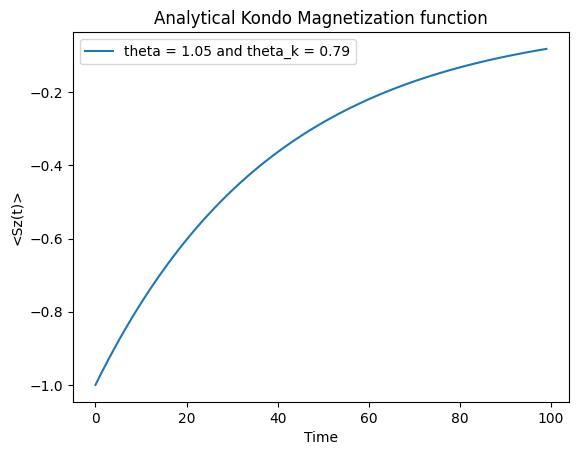

tb =  223.6254706709818


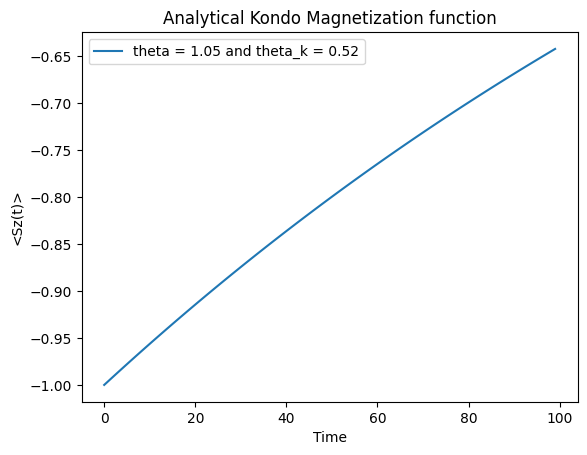

tb =  19.75399660794986


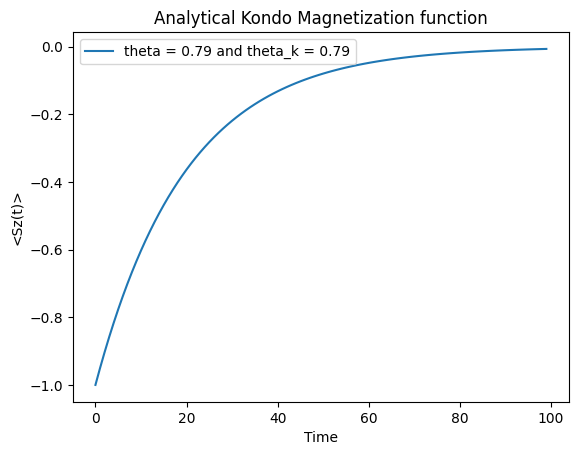

tb =  81.25313403012645


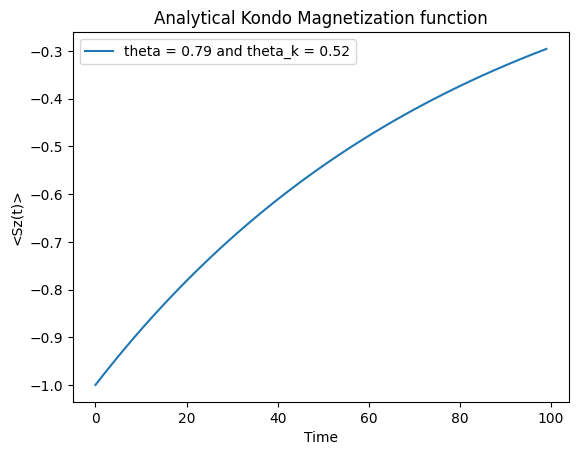

In [11]:
plot_corr0(theta_list,thetak_list)

In [12]:
from scipy.signal import find_peaks
from numpy.fft import fft, ifft

Prominent frequencies for theta_k =  0.82  are  [0.004439511653718091, 0.008879023307436182]
Time periods for theta_k =  0.82  are  [225.25  112.625]
Prominent Peak values for theta_k =  0.82  are  [20.705427197447136, 15.371084305714145]


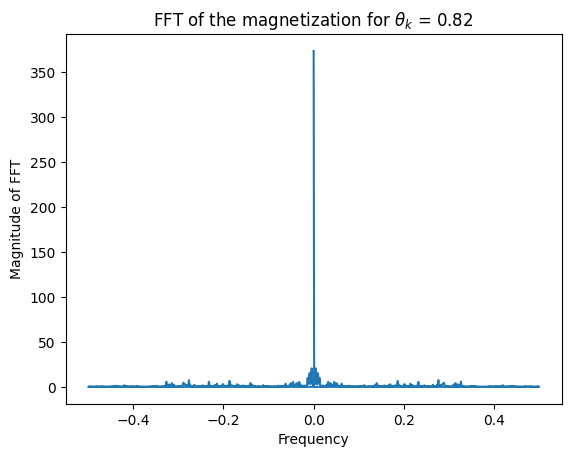

Prominent frequencies for theta_k =  0.72  are  [0.004439511653718091, 0.008879023307436182]
Time periods for theta_k =  0.72  are  [225.25  112.625]
Prominent Peak values for theta_k =  0.72  are  [25.55992733115434, 17.947403263146807]


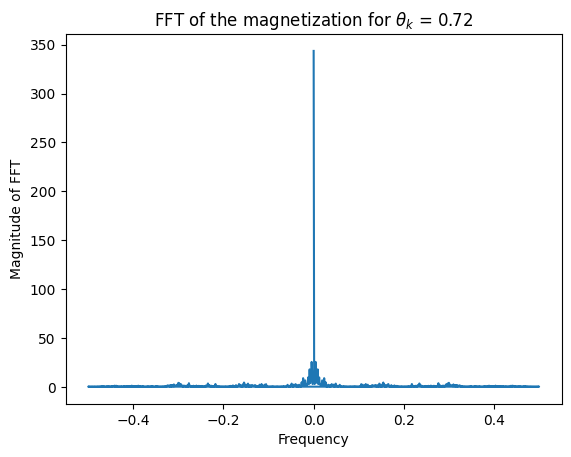

Prominent frequencies for theta_k =  0.65  are  [0.006659267480577137, 0.009988901220865706]
Time periods for theta_k =  0.65  are  [150.16666667 100.11111111]
Prominent Peak values for theta_k =  0.65  are  [35.26226189637566, 21.50065365177713]


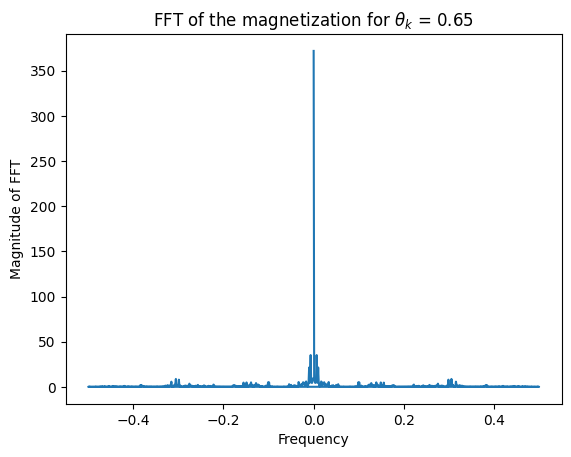

Prominent frequencies for theta_k =  0.62  are  [0.00776914539400666, 0.011098779134295227]
Time periods for theta_k =  0.62  are  [128.71428571  90.1       ]
Prominent Peak values for theta_k =  0.62  are  [36.970004012152216, 16.890930404871177]


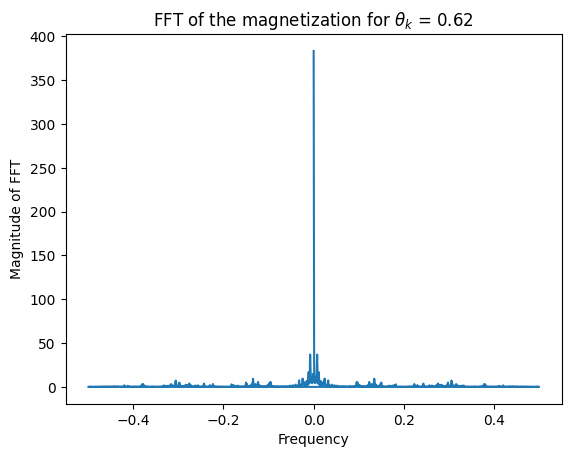

Prominent frequencies for theta_k =  0.55  are  [0.008879023307436182, 0.011098779134295227]
Time periods for theta_k =  0.55  are  [112.625  90.1  ]
Prominent Peak values for theta_k =  0.55  are  [45.69059345752228, 19.292315174993362]


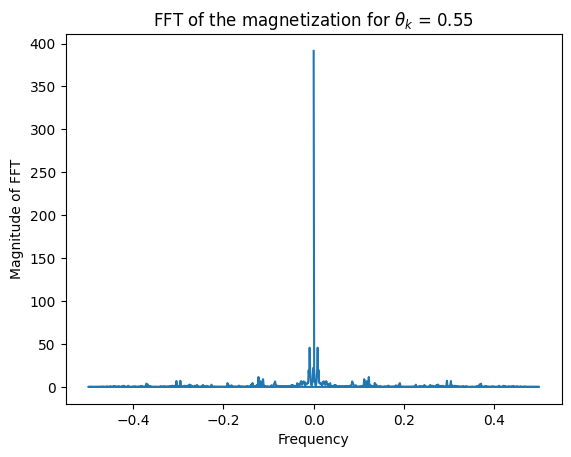

Prominent frequencies for theta_k =  0.45  are  [0.00776914539400666, 0.009988901220865706, 0.01220865704772475, 0.06992230854605994, 0.09433962264150944, 0.10321864594894561]
Time periods for theta_k =  0.45  are  [128.71428571 100.11111111  81.90909091  14.3015873   10.6
   9.68817204]
Prominent Peak values for theta_k =  0.45  are  [14.332137373663937, 29.976001003747953, 12.754433096066641, 28.041499931161695, 15.718464233096375, 12.583266632967831]


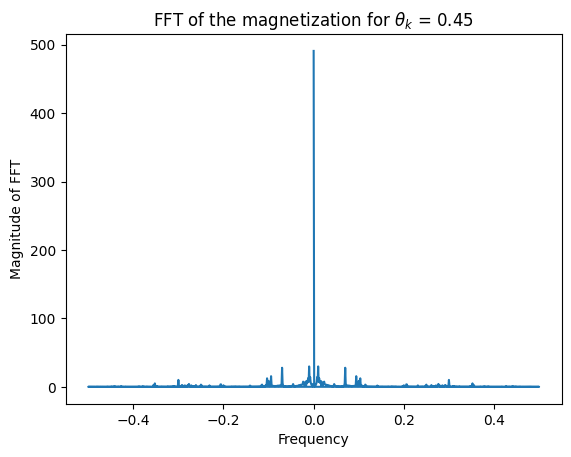

Prominent frequencies for theta_k =  0.42  are  [0.008879023307436182, 0.01220865704772475, 0.022197558268590455, 0.06437291897891233, 0.08879023307436182, 0.09655937846836848]
Time periods for theta_k =  0.42  are  [112.625       81.90909091  45.05        15.53448276  11.2625
  10.35632184]
Prominent Peak values for theta_k =  0.42  are  [37.41707055811256, 16.70294978002931, 13.194534825595607, 20.564621001348343, 17.55475252730347, 12.006814365719803]


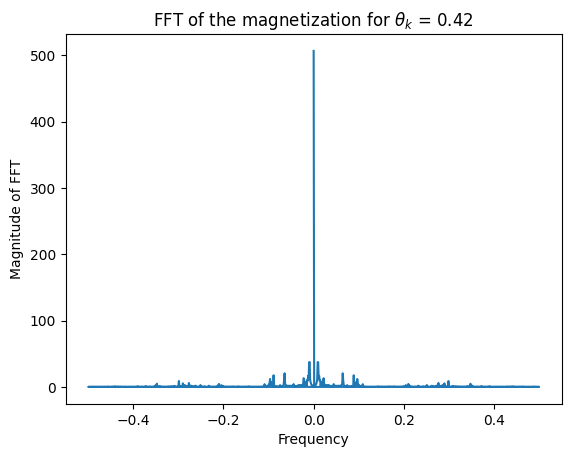

In [19]:
#Let us draw a comparision plot for analytical and numerical magnetization

N = 6
theta= 1.07 #pass the true values here
theta_k_list = [0.82, 0.72, 0.65, 0.62, 0.55, 0.45, 0.42]
max_trotter_steps = 1000

#i = 0

sz_vals = [0]*900  
sz_vals2 = [0]*901
sz_vals3 = [0]*max_trotter_steps
sz_vals4 = [0]*max_trotter_steps
sz_vals5 = [0]*max_trotter_steps

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta_k in theta_k_list:
    for i in range(100,max_trotter_steps+1):
        data2 = np.loadtxt(f"../scaled_codes/data/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
        sz_vals2[i-100] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft1 = fft(sz_vals2)
        #find list of frequencies

    freqs = np.fft.fftfreq(len(sz_vals2))
        #find the peaks
    peaks, _ = find_peaks(np.abs(fft1))
    peaks = peaks[freqs[peaks] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs = [freqs[i] for i in peaks if np.abs(fft1[i]) > 12]

    time_periods = 1/np.abs(prom_freqs)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta_k = ",theta_k," are ",prom_freqs) #print the prominent frequencies
    print("Time periods for theta_k = ",theta_k," are ",time_periods) #print the time periods

    peak_vals = [np.abs(fft1[i]) for i in peaks if np.abs(fft1[i]) > 12] #find the prominent peak values

    print("Prominent Peak values for theta_k = ",theta_k," are ",peak_vals) #print the peak values

        #plot the magnitudes wrt to the frequencies
    plt.plot(freqs,np.abs(fft1))
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta_k$ = " + str(theta_k))
    plt.show()


        
    #data2 = np.loadtxt(f"scaled_codes/data/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    #sz_vals5[i] = data2[1]     

In [25]:
val_list = plot_corr0_2(np.pi/3,np.pi/4, n = 400)

tb =  223.6254706709818


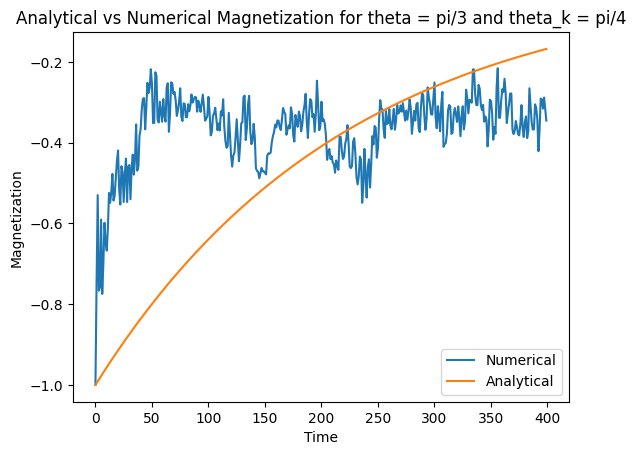

In [26]:
## Now we will plot the magnetization values
t_list = list(range(400))

plt.plot(t_list,sz_vals2,label = "Numerical")
plt.plot(t_list,val_list,label = "Analytical")

plt.xlabel("Time")
plt.ylabel("Magnetization")
plt.title("Analytical vs Numerical Magnetization for theta = pi/3 and theta_k = pi/4")

plt.legend()


Text(0.5, 1.0, '$t_b$ as a function of $\\theta_k$ for constant $\\theta$')

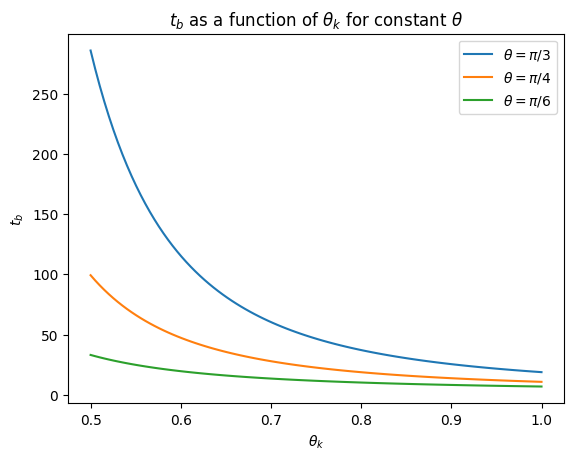

In [10]:
## Let us plot tb as a function of theta_k

theta1 = np.pi/3
theta2 = np.pi/4
theta3 = np.pi/6

theta_k_list1 = np.linspace(0.5,1,100)
theta_k_list2 = np.linspace(0.5,1,100)
theta_k_list3 = np.linspace(0.5,1,100)
tb_list1 = []
tb_list2 = []
tb_list3 = []
for theta_k in theta_k_list1:
    tb_list1.append(w*np.pi/tk_col(theta1,theta_k))

for theta_k in theta_k_list2:
    tb_list2.append(w*np.pi/tk_col(theta2,theta_k))

for theta_k in theta_k_list3:
    tb_list3.append(w*np.pi/tk_col(theta3,theta_k))

plt.plot(theta_k_list1,tb_list1, label = r"$\theta = \pi/3$")
plt.plot(theta_k_list2,tb_list2, label = r"$\theta = \pi/4$")
plt.plot(theta_k_list3,tb_list3, label = r"$\theta = \pi/6$")
plt.xlabel(r"$\theta_k$")
plt.ylabel(r"$t_b$")
plt.legend()
plt.title(r"$t_b$ as a function of $\theta_k$ for constant $\theta$")